In [58]:
import sklearn
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
import pickle
import os
import joblib

import warnings
warnings.filterwarnings('ignore')

In [59]:
df_train = pd.read_pickle("./train_data.pkl")
df_test = pd.read_pickle("./test_data.pkl")
df_test

,bron_autotrack,bron_marktplaats,bouwjaar,kilometer_stand,vermogen,prijs,is_handgeschakeld,is_benzine,upload_datum
485,1,0,2012,105585,69,5450.0,1,1,1
73,0,1,2006,194448,78,1999.0,1,1,737574
348,1,0,2012,53816,69,6395.0,1,1,1
86,0,1,2011,247092,84,1750.0,1,0,737574
456,1,0,2008,110026,78,5430.0,1,1,1
...,...,...,...,...,...,...,...,...,...
93,0,1,2007,70185,65,3999.0,1,1,737567
324,1,0,2010,230403,86,2799.0,1,0,1
180,0,1,2009,174900,65,2999.0,1,1,737567
305,1,0,2013,119912,86,6400.0,1,1,1


In [60]:
df_train = df_train[df_train['upload_datum'] > 1]
df_test = df_test[df_test['upload_datum'] > 1]

In [61]:
X_train = df_train.drop(['prijs'], axis=1)
y_train = df_train[['prijs']]

X_test = df_train.drop(['prijs'], axis=1)
y_test = df_train[['prijs']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tf, X_valid, y_train_tf, y_valid = train_test_split(X_train, y_train)

In [62]:
df_train.drop(['prijs'], axis=1)

,bron_autotrack,bron_marktplaats,bouwjaar,kilometer_stand,vermogen,is_handgeschakeld,is_benzine,upload_datum
231,0,1,2006,190637,77,1,1,737563
137,0,1,2010,175598,84,1,0,737571
195,0,1,2006,292552,78,1,1,737567
69,0,1,2011,197051,84,1,0,737557
209,0,1,2011,266003,84,1,0,737565
...,...,...,...,...,...,...,...,...
214,0,1,2008,102301,120,1,1,737565
20,0,1,2010,217393,84,1,0,737575
71,0,1,2008,182219,67,1,1,737560
106,0,1,2008,156209,65,1,1,737570


200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

(0.0, 406.0)

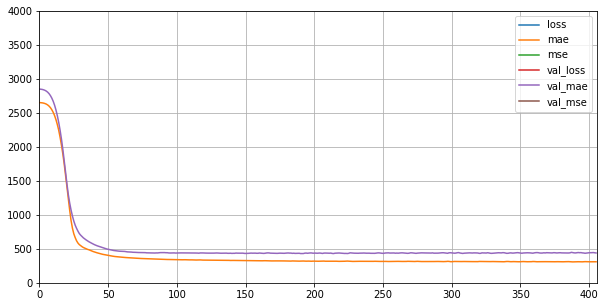

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(60, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(6, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    loss="mean_squared_error", 
    optimizer=optimizer, 
    metrics=['mae', 'mse']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(
    X_train_tf, 
    y_train_tf.values, 
    batch_size=32, 
    epochs=500, 
    validation_data=(X_valid, y_valid.values),
    verbose=0,
    callbacks=[callback]
)

mse_test = model.evaluate(X_test, y_test.values)

pd.DataFrame(history.history).plot(figsize=(10, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 4000) 
plt.gca().set_xlim(0, len(history.history['loss'])) 

In [65]:
model_version = "0001"
model_name = "TFAuto"
model_path = os.path.join(model_name) 
model.save(model_path)
scaler_path = os.path.join(model_name, 'TFScaler.pkl') 
joblib.dump(scaler, scaler_path) 

INFO:tensorflow:Assets written to: TFAuto/assets


['TFAuto/TFScaler.pkl']

In [66]:
X_test

array([[ 0.        ,  0.        , -1.12256719, ...,  0.24124895,
         0.63134887, -0.08259309],
       [ 0.        ,  0.        ,  1.17424548, ...,  0.24124895,
        -1.58391033,  0.54969851],
       [ 0.        ,  0.        , -1.12256719, ...,  0.24124895,
         0.63134887,  0.23355271],
       ...,
       [ 0.        ,  0.        ,  0.02583914, ...,  0.24124895,
         0.63134887, -0.31970244],
       [ 0.        ,  0.        ,  0.02583914, ...,  0.24124895,
         0.63134887,  0.47066206],
       [ 0.        ,  0.        ,  0.02583914, ...,  0.24124895,
         0.63134887,  0.70777141]])